# IDA - Customer Churn Prediction

In [122]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings='ignore'

In [123]:
#Loading data
df=pd.read_csv("TelcoCustomerChurn.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,5196-WPYOW,1.0,United States,California,Paso Robles,93446.0,"35.634222, -120.728341",35.634222,-120.728341,Male,...,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0
1,8189-HBVRW,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,No,Electronic check,90.80,4921.2,5249.0,NaN,0.0
2,4091-TVOCN,1.0,United States,California,Potrero,91963.0,"32.619465, -116.593605",32.619465,-116.593605,Male,...,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0
3,9603-OAIHC,1.0,United States,California,Palmdale,93551.0,"34.613476, -118.256358",34.613476,-118.256358,Male,...,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0
4,8647-SDTWQ,1.0,United States,California,Hood,95639.0,"38.375325, -121.507935",38.375325,-121.507935,Male,...,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0


In [124]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [125]:
df['Gender']=df['Gender'].astype('category')

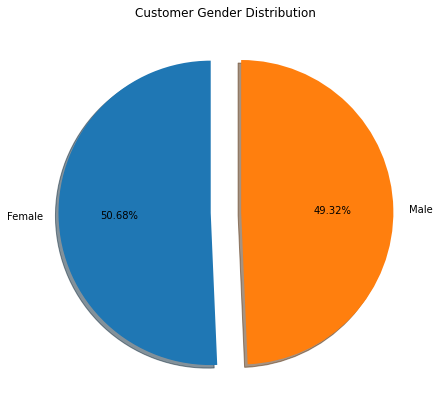

In [126]:
# Creating plots
fig = plt.figure(figsize =(10, 7))
plt.pie(df["Gender"].value_counts(), labels = df.Gender.cat.categories, startangle=90,explode=(0.1, 0.1),shadow=True,autopct='%1.2f%%')
plt.title('Customer Gender Distribution')
plt.show()

In [139]:
import geopy
from geopy.geocoders import Nominatim

In [128]:
import geopandas as gpd
import plotly.express as px
import descartes
from shapely.geometry import Point, Polygon

In [129]:
geometry=[Point(xy) for xy in zip(df["Longitude"],df["Latitude"])]
crs={'init':'epsg:4326'}

In [130]:
geo_df=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)
geo_df.head()

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value,geometry
0,5196-WPYOW,1.0,United States,California,Paso Robles,93446.0,"35.634222, -120.728341",35.634222,-120.728341,Male,...,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0,POINT (-120.72834 35.63422)
1,8189-HBVRW,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,Month-to-month,No,Electronic check,90.80,4921.2,5249.0,NaN,0.0,POINT (-118.30742 34.05928)
2,4091-TVOCN,1.0,United States,California,Potrero,91963.0,"32.619465, -116.593605",32.619465,-116.593605,Male,...,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0,POINT (-116.59360 32.61946)
3,9603-OAIHC,1.0,United States,California,Palmdale,93551.0,"34.613476, -118.256358",34.613476,-118.256358,Male,...,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0,POINT (-118.25636 34.61348)
4,8647-SDTWQ,1.0,United States,California,Hood,95639.0,"38.375325, -121.507935",38.375325,-121.507935,Male,...,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0,POINT (-121.50794 38.37532)


<AxesSubplot:>

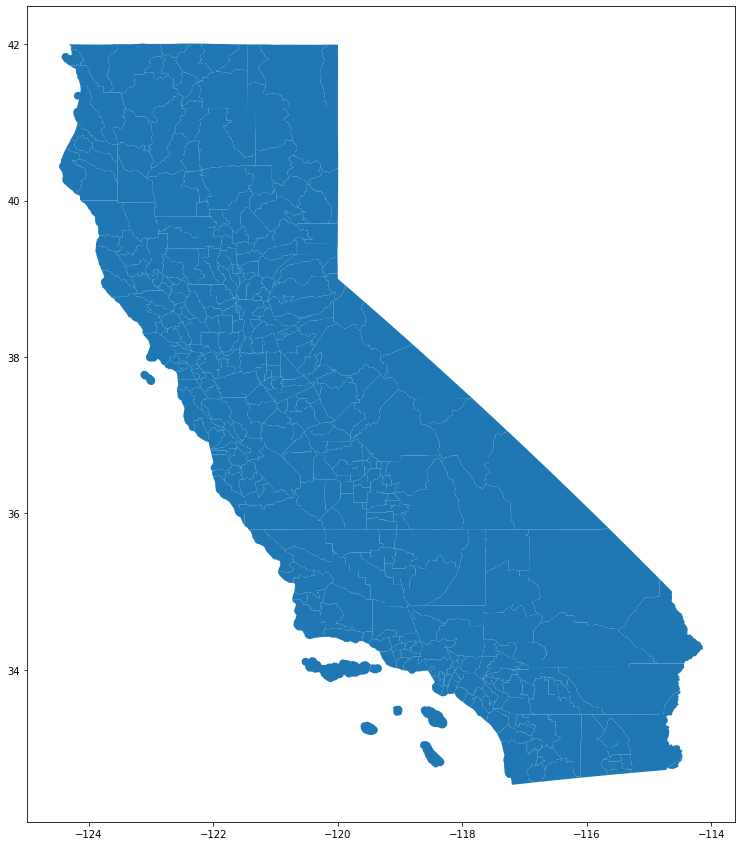

In [136]:
street_map=gpd.read_file('C:/Users/USER/ML Working/Cutomer Churn Project/tl_2016_06_cousub.shp')
fig,ax=plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

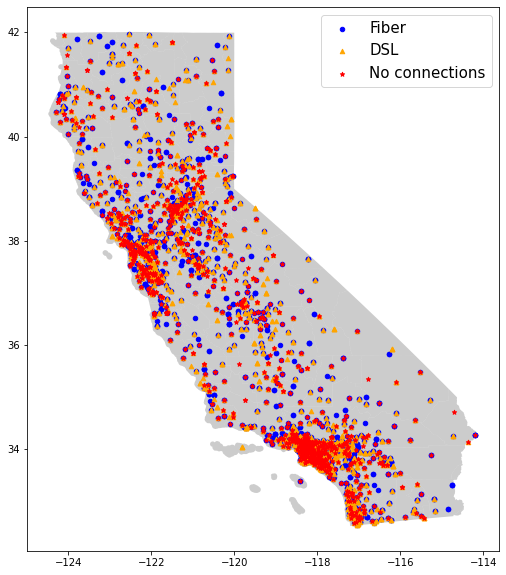

In [138]:
fig,ax=plt.subplots(figsize=(10,10))
street_map.plot(ax=ax, alpha=0.4, color="grey")
geo_df[geo_df['Internet Service']=="Fiber optic"].plot(ax=ax,markersize=20,color="blue",marker="o",label="Fiber")
geo_df[geo_df['Internet Service']=="DSL"].plot(ax=ax,markersize=20,color="orange",marker="^",label="DSL")
geo_df[geo_df['Internet Service']=="No"].plot(ax=ax,markersize=20,color="red",marker="*",label="No connections")
ax.legend(prop={'size': 15})